# Colorful dimension on multi class category

In this example each earth image could have a variable number of "labels", like `['road', 'water', 'habitation']` in an aerial view of San Francisco.

Notebook based on course v3 lesson 3.
Be sure to run that notebook first.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #for HiDpi display

In [2]:
from colorfuldim import ActivationsHistogram

In [3]:
from fastai.vision import *

# Print current version
from fastai.version import __version__
print('fastai version: ', __version__)

fastai version:  1.0.53.dev0


## Prepare data bunch

In [4]:
path = Config.data_path()/'planet'

df = pd.read_csv(path/'train_v2.csv')
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

In [7]:
for i,c in enumerate(data.classes): print(i,c)

0 agriculture
1 artisinal_mine
2 bare_ground
3 blooming
4 blow_down
5 clear
6 cloudy
7 conventional_mine
8 cultivation
9 habitation
10 haze
11 partly_cloudy
12 primary
13 road
14 selective_logging
15 slash_burn
16 water


In [6]:
labels = torch.cat([yb for _,yb in data.train_dl], dim=0)
labels.shape

torch.Size([32384, 17])

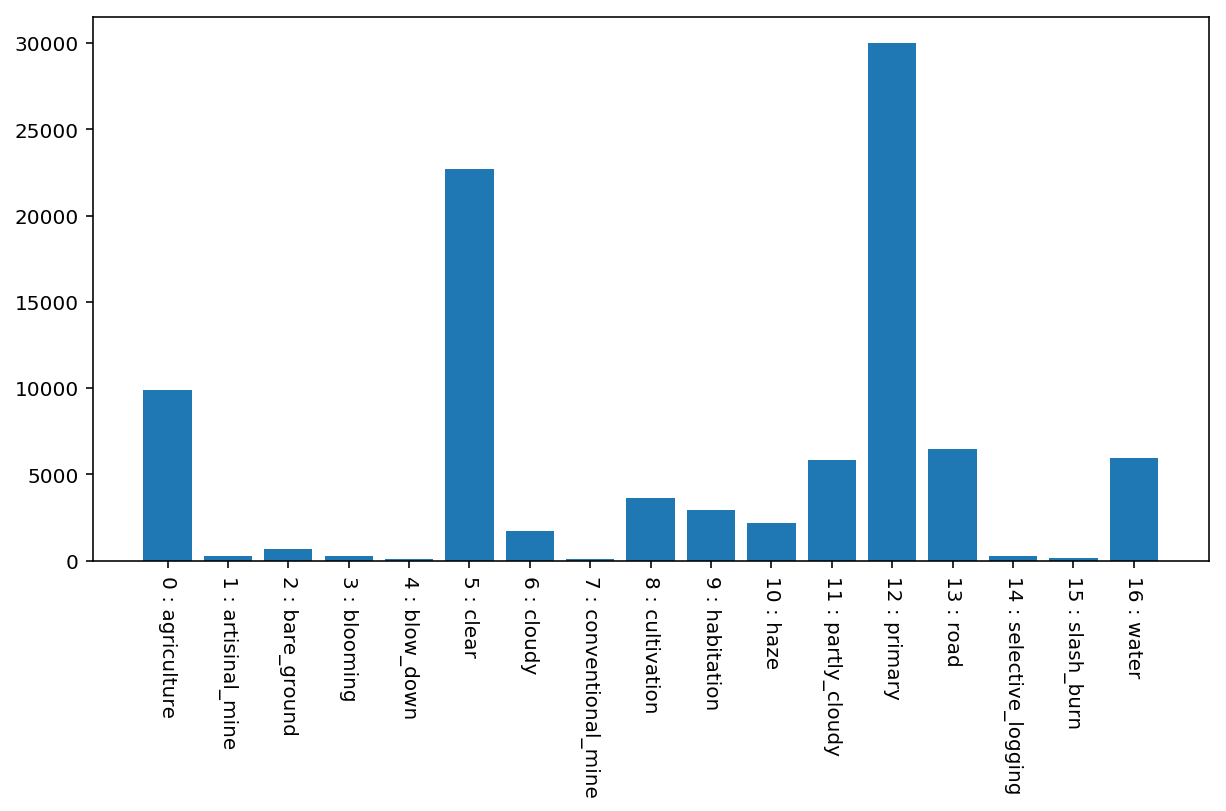

In [15]:
plt.figure(figsize=(10,5))
s = labels.sum(0)
xx = range(len(s))
plt.bar(xx,s);
plt.xticks(xx,map(lambda x: f'{x[0]} : {x[1]}',zip(xx,data.classes)),rotation=-90);

## Train the model

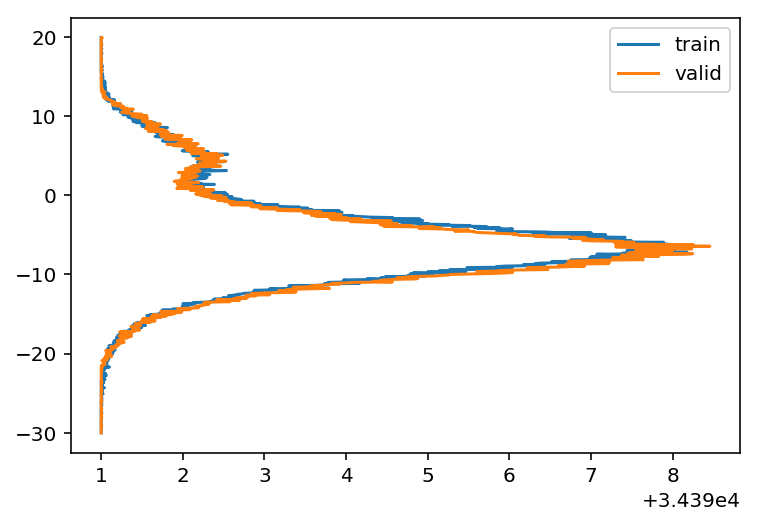

In [5]:
arch = models.resnet50
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
actsHist = partial(ActivationsHistogram,hMin=-30,hMax=20,nBins=800,modulesId=-1,useClasses=True)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score], callback_fns=actsHist)
learn.fit_one_cycle(5, slice(3e-2))

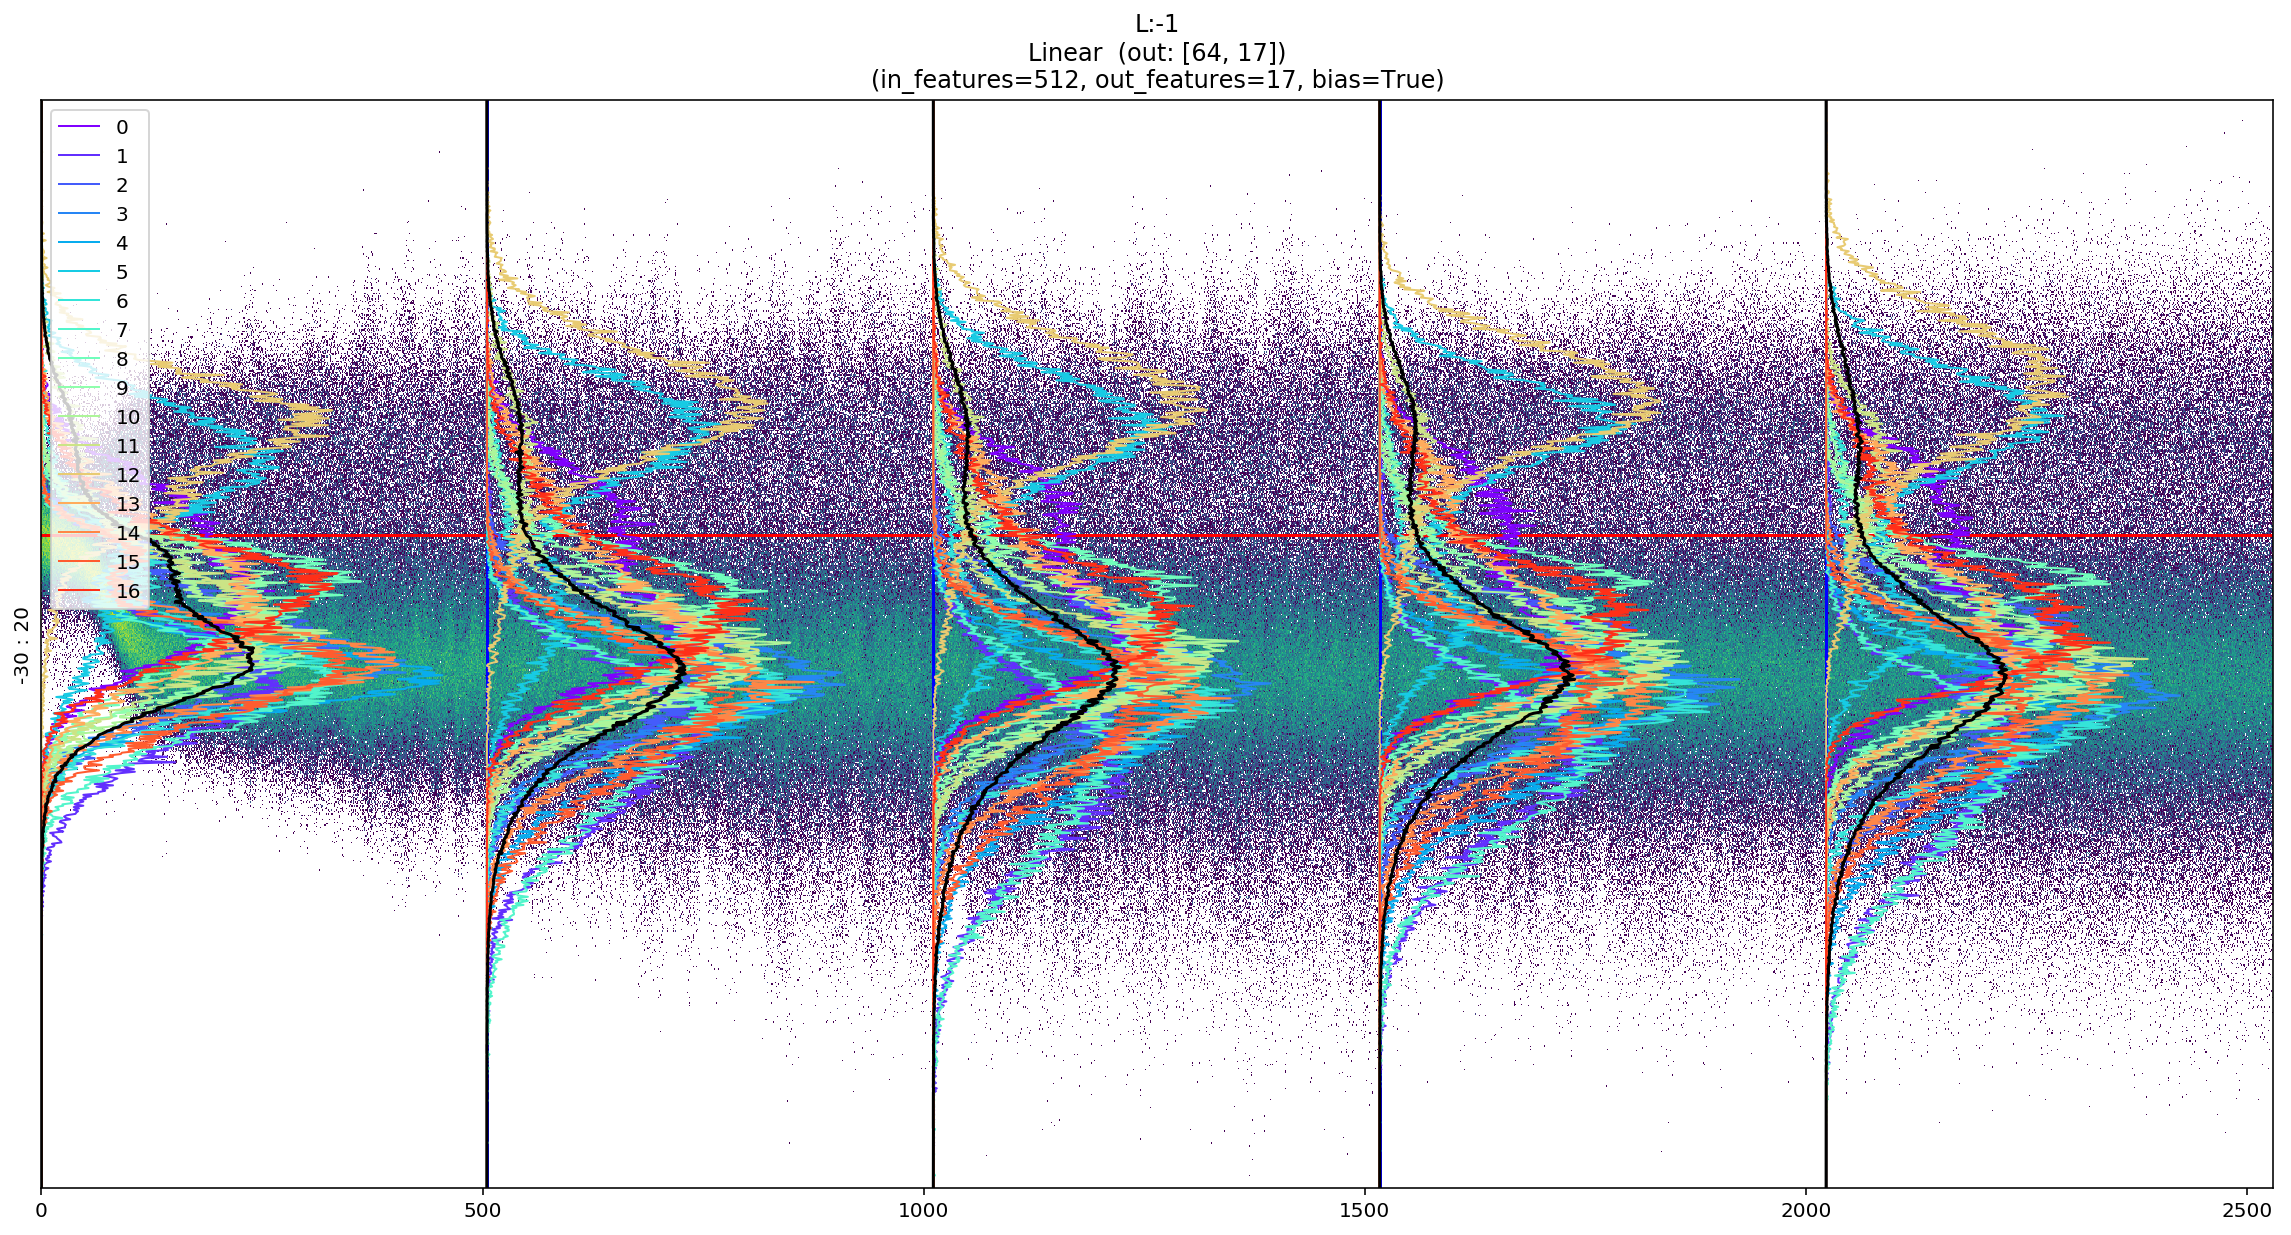

In [6]:
learn.activations_histogram.plotActsHist(figsize=(20,10), showEpochs=True, toDisplay=-1, hScale=500, showLayerInfo=True)

Note that the **YES** peaks (positive) resemble the labels distribution. The **NO** peaks depends on "missing values".

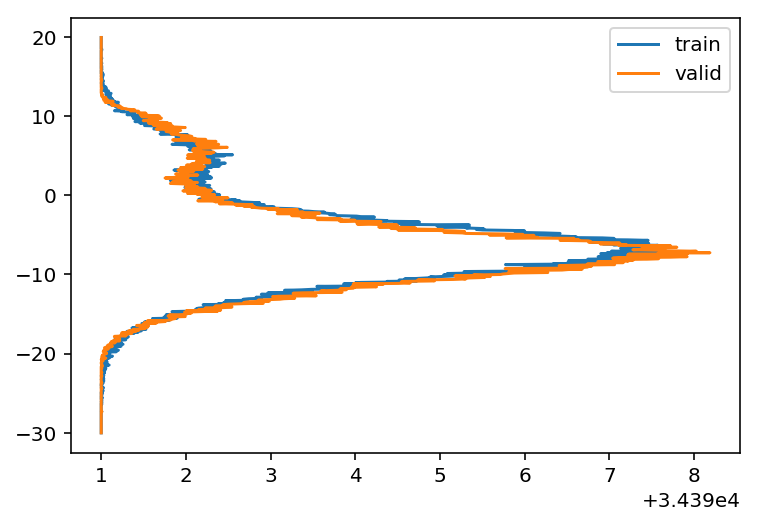

In [8]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

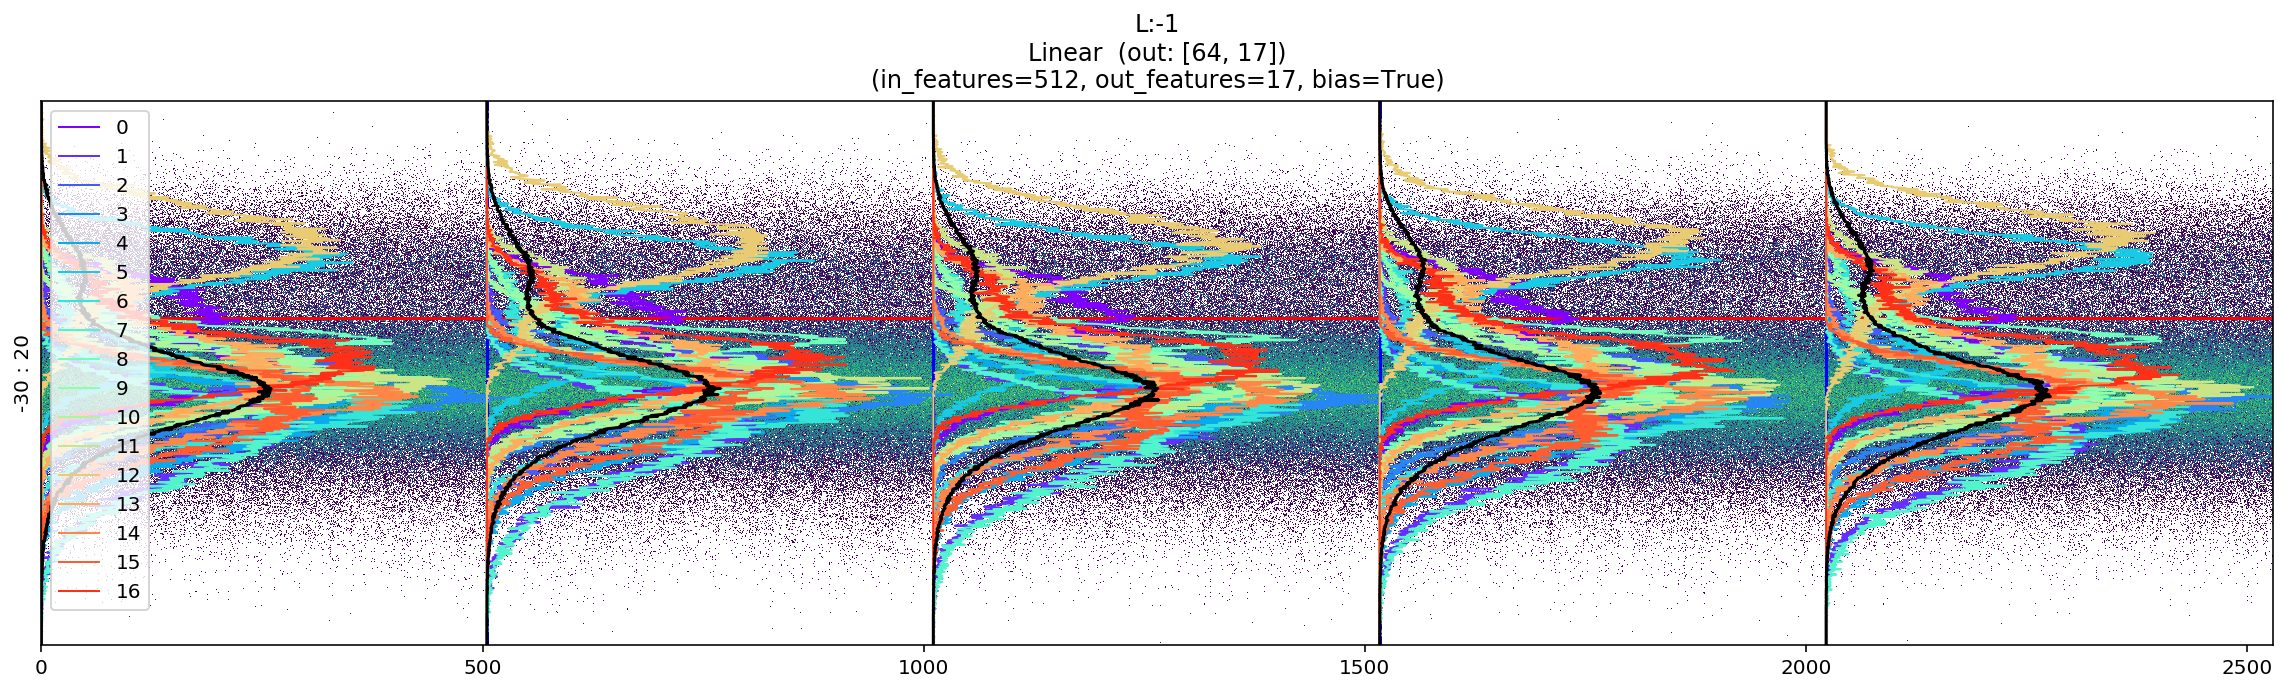

In [9]:
learn.activations_histogram.plotActsHist(figsize=(20,5), showEpochs=True, toDisplay=-1, hScale=650, showLayerInfo=True)

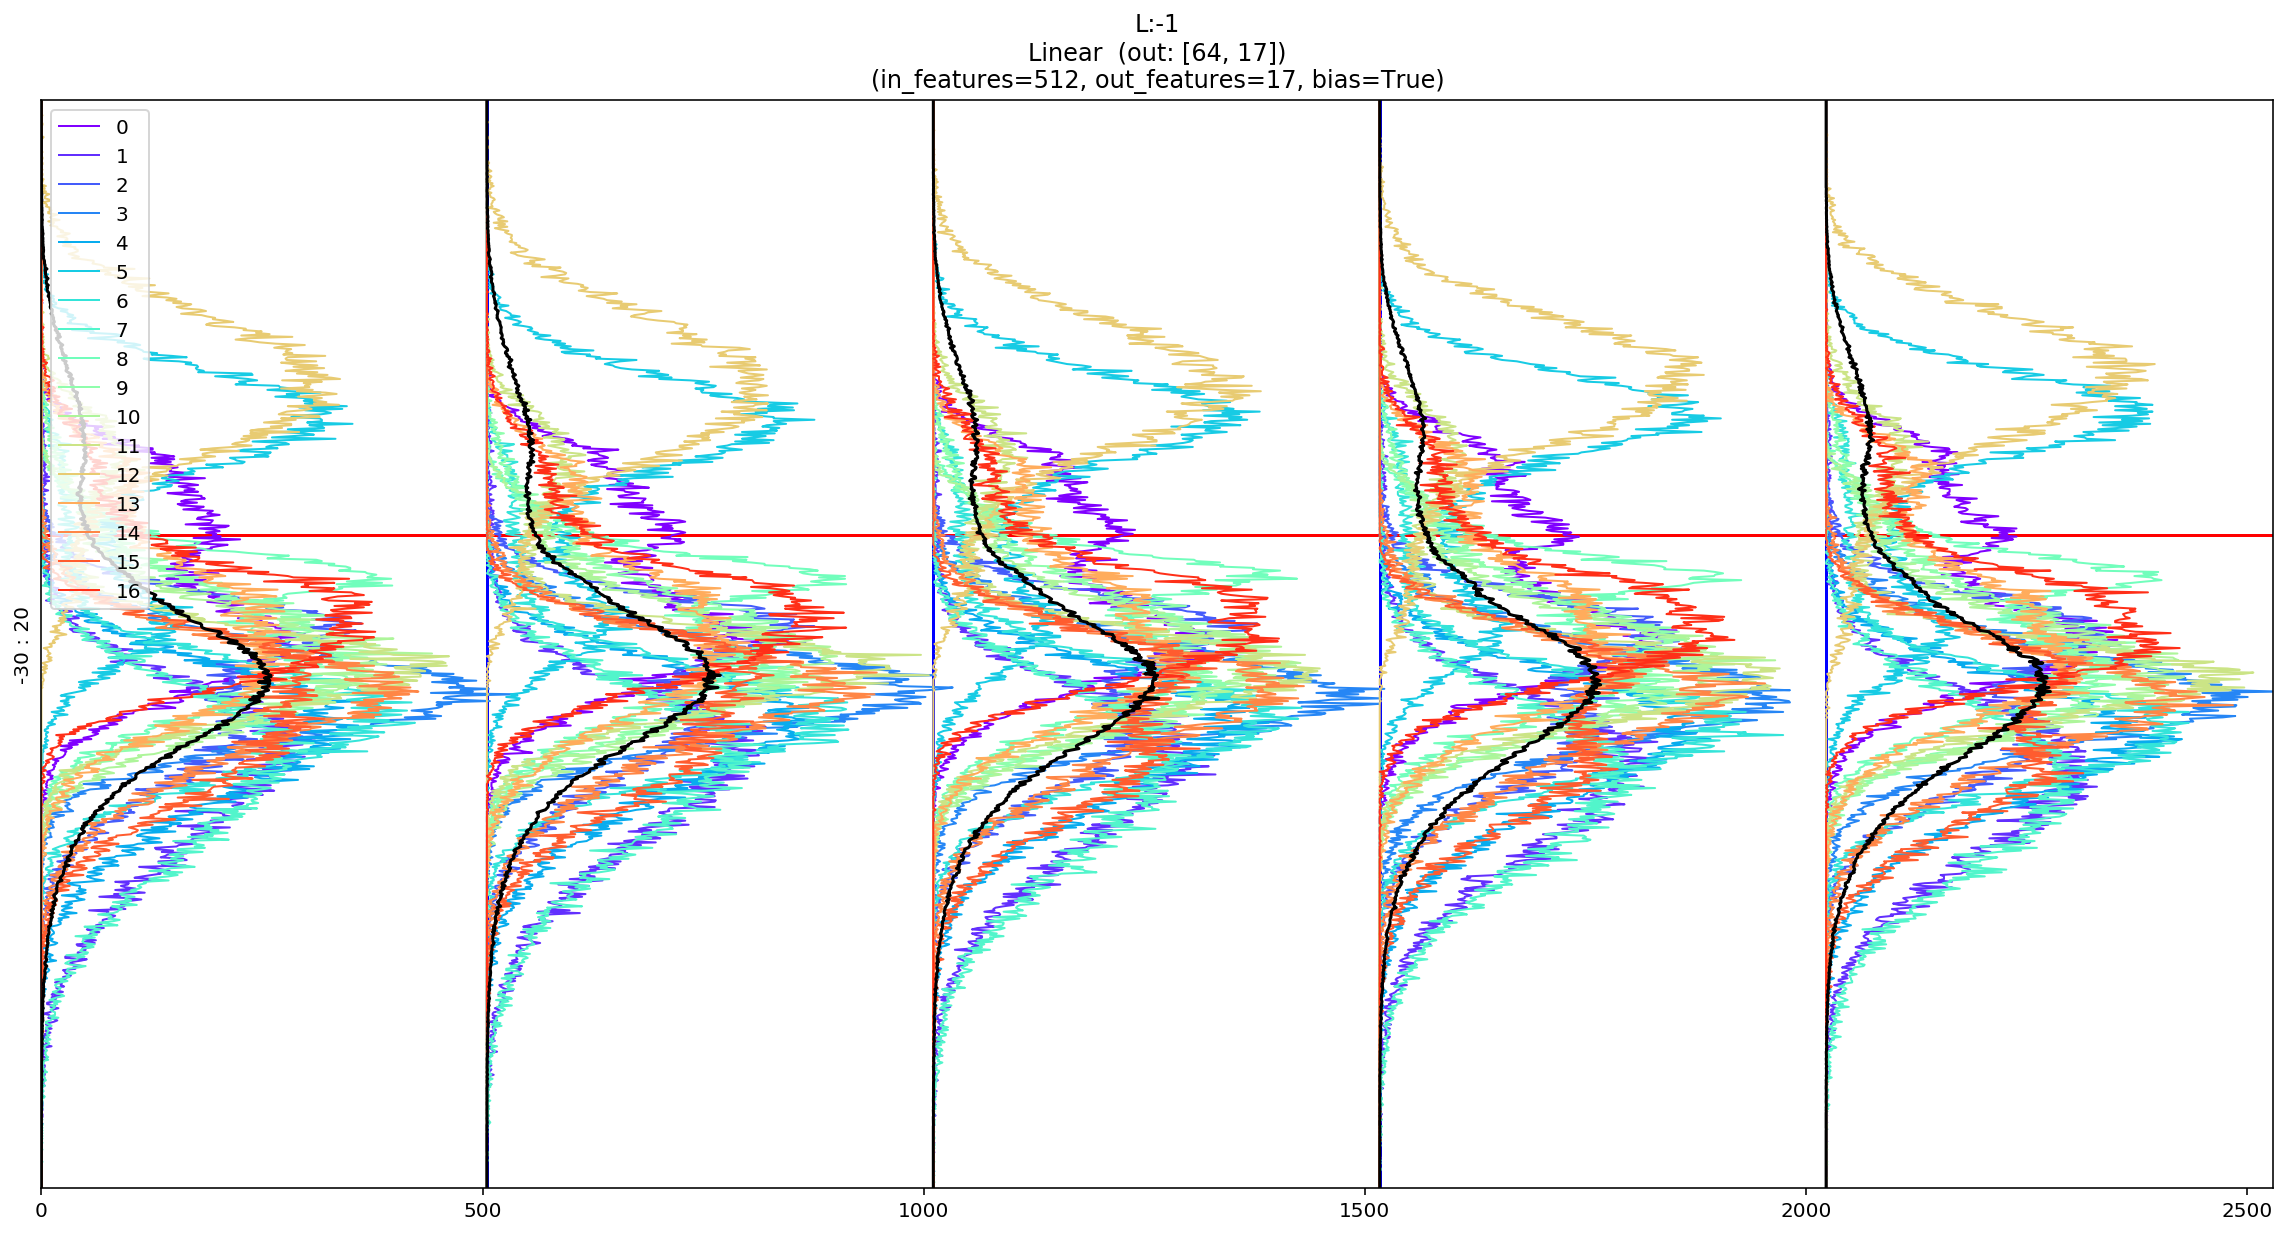

In [10]:
learn.activations_histogram.plotActsHist(figsize=(20,10), showEpochs=True, toDisplay=-1, hScale=650, showLayerInfo=True, showImage=False)